Please enter your adress street first, then city, separated by a comma:
Kerkstraat, Zaltbommel
You entered Kerkstraat, Zaltbommel
Drawing map...


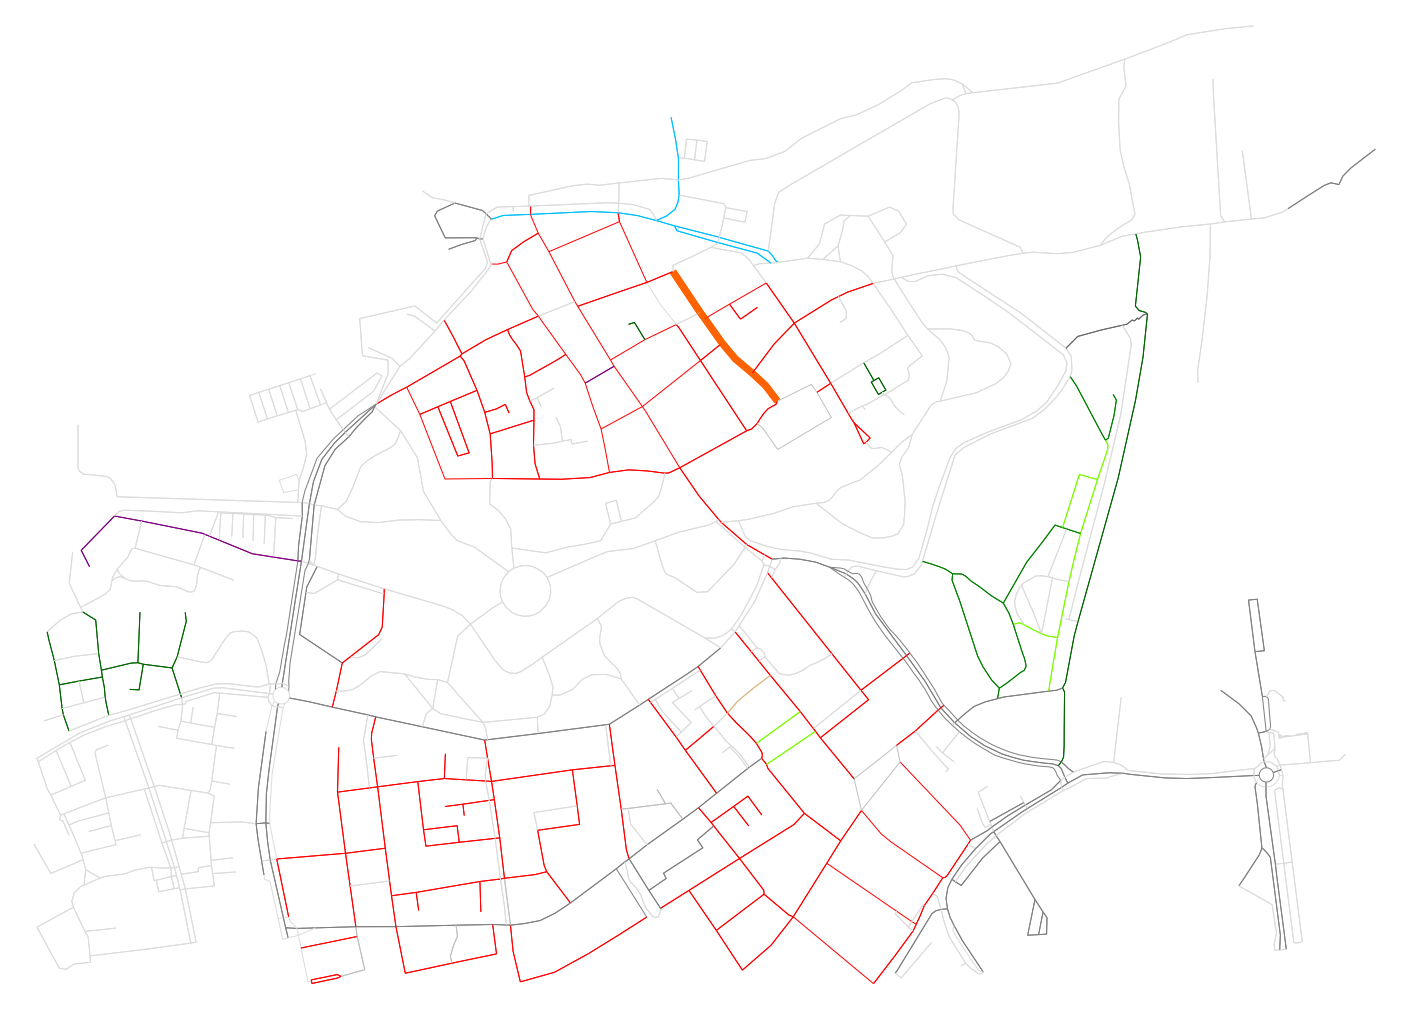

In [54]:
user_place = input("Please enter your adress street first, then city, separated by a comma:\n")
your_street=user_place.split(',',1)[0].lower()
print(f'You entered {user_place}')
print(f'Drawing map...')
import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
#from collections import Counter
from matplotlib import colors
import matplotlib.cm as cm
import matplotlib.image as mpimg
#from matplotlib.colors import Normalize
#from numpy.random import rand
%matplotlib inline
ox.config(log_console=True, use_cache=True)

# the colourcode function looks at the street(edge)-names and returns a color based on the type of street.
# You can have different languages that have different definitions for this
def colourcode(x):
        if (your_street in x):
            return '#ff6200'
        elif ('laan' in x): 
            return 'green'
        elif ('weg' in x):
            return 'grey'
        elif ('straat' in x):
            return 'red'
        elif ('gracht' in x):
            return 'blue'
        elif ('kade' in x):
            return 'deepskyblue'
        elif ('dreef' in x):
            return 'orange'
        elif ('plein' in x):
            return 'silver'
        elif ('steeg' in x):
            return 'purple'
        elif ('burcht' in x):
            return 'saddlebrown'
        elif ('erf' in x):
            return 'springgreen'
        elif ('hof' in x):
            return 'darkgreen'
        elif ('plantsoen' in x):
            return 'lawngreen'
        elif ('pad' in x):
            return 'burlywood'
        elif ('burg' in x):
            return 'dimgray'
        elif ('steijn' in x):
            return 'rosybrown'
        elif (x[-3:]=='lei'):
            return 'black'
        else:
            return 'gainsboro'
 # This function adds a column to the dataframe with the type of street, that can be used to count how many of each type there are
def street_type_counter(x):
        if ('laan' in x): 
            return 'laan'
        elif ('weg' in x):
            return 'weg'
        elif ('straat' in x):
            return 'straat'
        elif ('gracht' in x):
            return 'gracht'
        elif ('kade' in x):
            return 'kade'
        elif ('dreef' in x):
            return 'dreef'
        elif ('plein' in x):
            return 'plein'
        elif ('steeg' in x):
            return 'steeg'
        elif ('burg' in x):
            return 'burg'
        elif ('erf' in x):
            return 'erf'
        elif ('hof' in x):
            return 'hof'
        elif ('pad' in x):
            return 'pad'
        elif ('burcht' in x):
            return 'burcht'
        elif ('steijn' in x):
            return 'steijn'
        elif ('plantsoen' in x):
            return 'plantsoen'
        elif (x[-3:]=='lei'):
            return 'lei'
        else:
            return 'other'
# possible other 'street-types': Baan (greyish),Berg, plaat, dijk, oord, wede, erf
def linethick(x):
    if your_street in x: return 7
    else: return 1

# USE THE USER INPUT TO CREATE A GRAPH AROUND THAT ADDRESS
G2 = ox.graph_from_address(user_place, network_type='all',dist=1000, dist_type='bbox')
# For the colouring, we take the attributes from each edge found extract the road name, and use the function above to create the colour array
edge_attributes = ox.graph_to_gdfs(G2, nodes=False)

# Clean the streetnames (there are lists in the street name column)
edge_attributes["new_name"]=edge_attributes["name"].astype(str)
edge_attributes["new_name2"]=edge_attributes["new_name"].str.split(',').str[0]
edge_attributes["new_name3"]=edge_attributes["new_name2"].str.replace('[','')
edge_attributes["new_name4"]=edge_attributes["new_name3"].str.replace("nan",'')
edge_attributes["name_clean"]=edge_attributes["new_name4"].str.replace("'","")
edge_attributes["name_type"]=[street_type_counter(str(row['name_clean']).lower()) for index, row in edge_attributes.iterrows()]

# color every street based on the streettype
ec = [colourcode(str(row['name_clean']).lower()) for index, row in edge_attributes.iterrows()]

# Different linewidth for shortest and longest name
lw = [linethick(str(row['name_clean']).lower()) for index, row in edge_attributes.iterrows()]

# use the cleaned dataframe to groupby on streetname_type
streets=edge_attributes.groupby(["name_clean","name_type"],as_index=False)["length"].sum()
streets['colour_name']=[colourcode(str(row['name_type']).lower()) for index, row in streets.iterrows()]

# maak een ingetelde dataframe op street_type
street_types=streets.groupby(['name_type'], as_index=True).agg(colour=('colour_name','first'),
                                                                street_count=('name_clean', "count"),
                                                                mean_length=('length',"mean")
                                                                )
street_types_sorted=street_types.sort_values(by=['street_count'])

fig,ax= ox.plot.plot_graph(G2, bgcolor='white', ax=None, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=lw, edge_alpha=1, figsize=(25,25), dpi=300 , show=False, close=False)

